# Graficación y Visualización

# Matplotlib

Matplotlib es una excelente librería para la generación de gráficos científicos en Python. Algunas de las ventajas de esta librería son las siguientes:

* Fácil de usar
* Soporte para etiquetas y textos en formato $\LaTeX$ 
* Control sobre cada elemento de la figura, incluyendo tamaños y DPI
* Resultados de alta calidad en muchos formatos, incluyendo PNG, PDF, SVG, etc.
* GUI para interactuar con figuras y soporte para generación de figuras masiva.

Una de las funciones principales de matplotlib es la capacidad de ser controlado por completo de manera programática, lo que convierte a matplotlib en una librería ideal para la generación de figuras que sean reproducibles y facilmente adaptables a nuevos conjuntos de datos.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MATLAB-like API

Como su nombre lo sugiere, Matplotlib se encuentra diseñada para ser compatible con las funciones de graficación de MATLABm por lo que es fácil iniciarse en su uso si se es familiar con MATLAB.

### EJEMPLO

Importemos un conjunto de datos sencillo y grafiquemoslo usando matplotlib:

In [4]:
rain = pd.read_table('data/nashville_precip.txt', delimiter='\s+', na_values='NA', index_col=0)
rain.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [5]:
x = rain.index.values
y = rain['Jan'].values

Text(0.5,1,'January rainfall in Nashville')

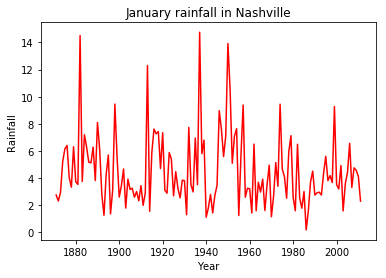

In [6]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('January rainfall in Nashville')

Es muy sencillo el personalizar aspectos de símbolos y crear gráficos adjuntos.

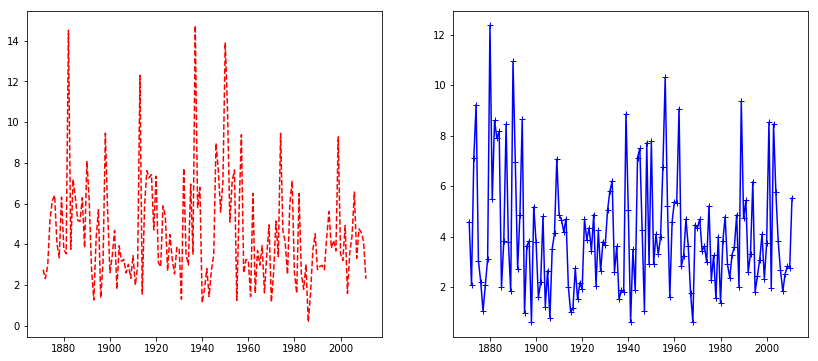

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(x, rain['Feb'], 'b+-')

A pesar de que el API que emula MATLAB es sencillo y conveniente, vale la pena aprender el API orientado a objetos de matplotlib, por su flexibilidad y poder para generar figuras avanzadas.

## API Orientado a Objetos

La idea principal de la programación orientada a objetos es tener métodos y funciones asociados a objetos especificos que operan sobre los mismos, sin que el estado de los objetos sea global.

Para usar el API orientado a objetos de matplotlib se inicia de manera similar al ejemplo anterior, pero en vez de crear una nueva figura global, se guarda una referencia a la nueva figura en la variable `fig`, y desde la misma se crea una instancia de un nuevo eje usando el método `add_axes` en la clase `Figura` de la cual `fig` es una instancia.

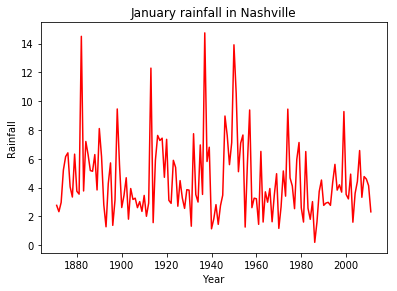

In [19]:
fig = plt.figure()

# left, bottom, width, height (range 0 to 1)
# as fractions of figure size
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

axes.plot(x, y, 'r')

axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')
axes.set_title('January rainfall in Nashville');

A pesar de que es necesario un poco más de código, se cuenta con la ventaja de que ahora se tiene control sobre dónde se encuentran los ejes del gráfico y su posición, haciendo más facil el agregar más de un set de ejes en la figura:

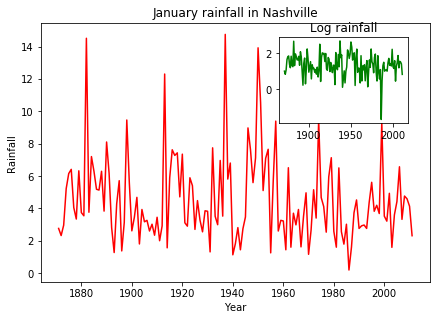

In [20]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig.add_axes([0.65, 0.65, 0.3, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('Year')
axes1.set_ylabel('Rainfall')
axes1.set_title('January rainfall in Nashville');

# insert
axes2.plot(x, np.log(y), 'g')
axes2.set_title('Log rainfall');

Si no se desea ser explícito acerca de donde van a ubicarse los ejes del gráfico, pueden utilizarse alguno de los muchos manejadores de layout de matplotlib, como `subplots`.

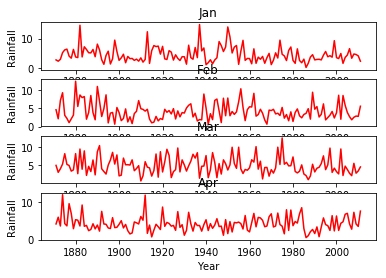

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1)

months = rain.columns

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    

Se puede lidiar con el traslape de las etiquetas usando el método `fig.tight_layout`, el cual automáticamente ajusta la posición de los ejes dentro del canvas de la figura de tal forma que no exista contenido traslapado:

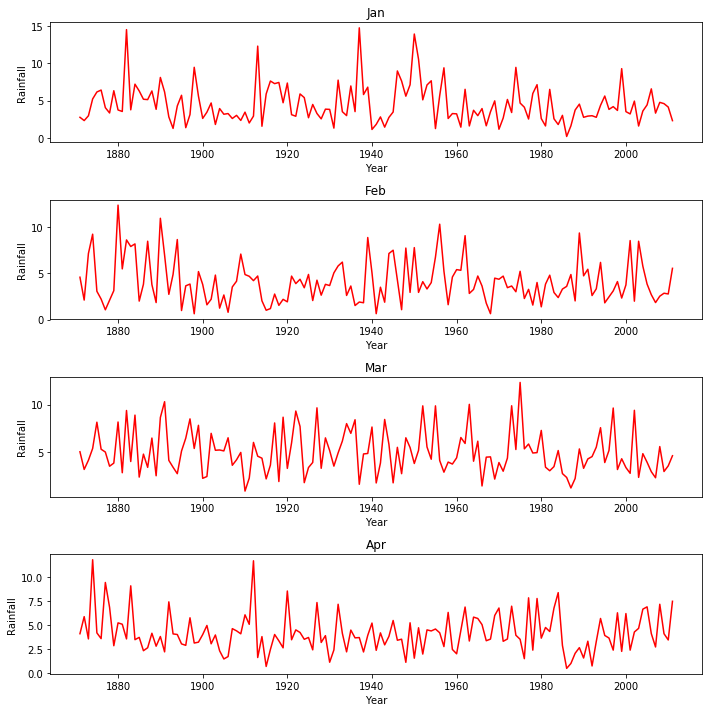

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    
fig.tight_layout()

## Manipulaando atributos de la figura

matplotlib permite modificar las proporciones de tamaño de la figura, su DPI y su tamaño cuando el objeto `Figure` es creado, usando los argumentos `figsize` y `dpi`. El primero es una tupla con el ancho y alto deseado en la figura en pulgadas, mientras que la segunda es la medida dpi (pixeles por pulgada). Para crear un gráfico de 800 x 400 pixeles, se puede especificar de la siguiente manera:

In [10]:
fig = plt.figure(figsize=(8,4), dpi=100)

Los mismos argumentos pueden proveérsele a los manejadores de layout, como a la función de `subplots`.

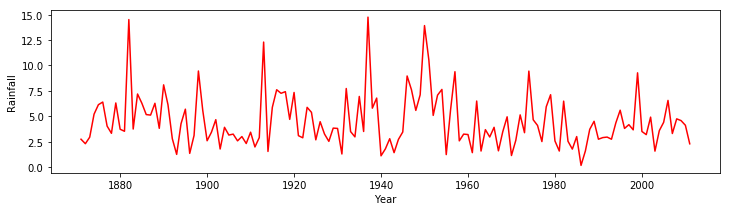

In [11]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')

Pueden también agregarse etiquetas a los datos:

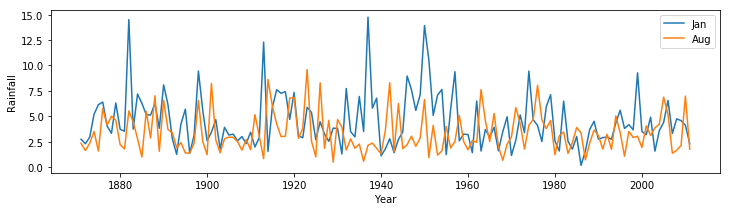

In [12]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(x, rain['Jan'], label="Jan")
ax.plot(x, rain['Aug'], label="Aug")
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.legend(loc=1); # upper left corner

# Graficación con Pandas

Matplotlib es un paquete de graficación de relativo bajo nivel, que hace pocas suposiciones acerca de lo que constituye una buena distribución gráfica (por diseño), pero posee mucha flexibilidad para otorgarle al usuario completo control sobre la apariencia del resultado.

Por otro lado, Pandas incluye métodos para objetos de tipo DataFrame y Series que son relativamente de alto nivel, y que hacen suposiciones razonables acerca de como debe verse el resultado.

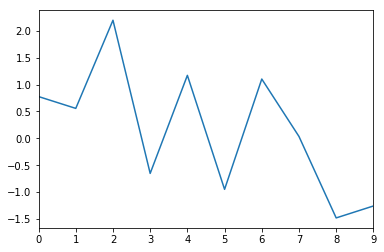

In [14]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Nótese que por defecto un gráfico de linea es dibujado.

La apariencia puede ser modificada:

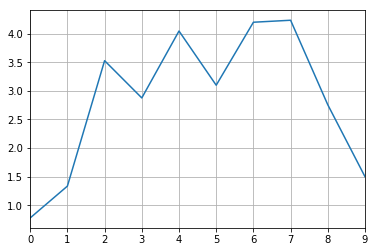

In [15]:
normals.cumsum().plot(grid=True)

De manera similar para un DataFrame:

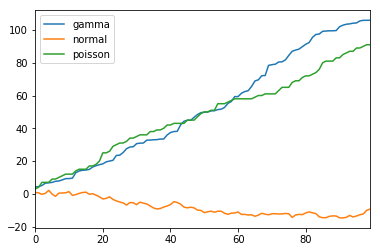

In [16]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113169080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112c72588>], dtype=object)

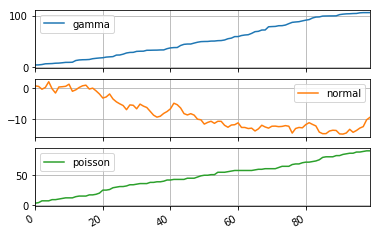

In [17]:
variables.cumsum(0).plot(subplots=True, grid=True)

In [21]:
variables.cumsum(0).plot(secondary_y='normal', grid=True)

NameError: name 'variables' is not defined

Si se desea, puede utilizarse la función `subplots` de matplotlib de manera directa, y asignarle gráficos a sus ejes:

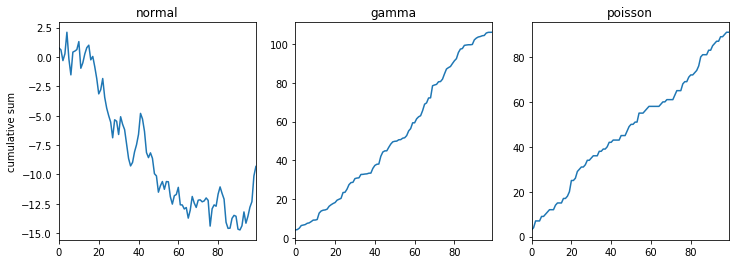

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Gráficos de Barra

Los gráficos de barra son útiles para mostrar y comparar cantidades medibles, como conteos y volúmenes. En Pandas, es sólo necesario usar el keyword `kind=bar` con el método de `plot`.

Para esta serie de ejemplos, vamos a volver al set de datos de Titanic:

In [20]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


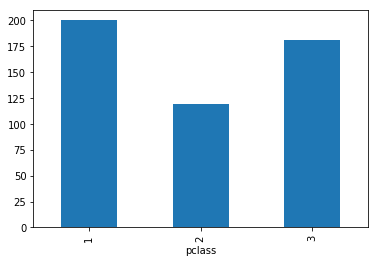

In [21]:
titanic.groupby('pclass').survived.sum().plot.bar()

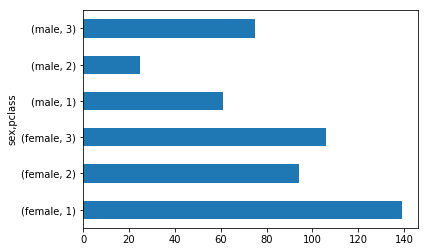

In [22]:
titanic.groupby(['sex','pclass']).survived.sum().plot.barh()

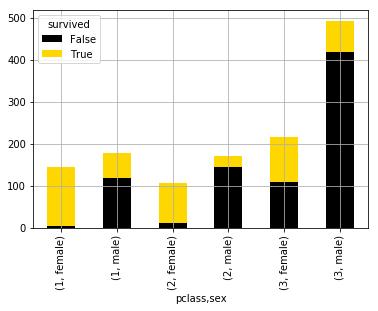

In [23]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot.bar(stacked=True, color=['black','gold'], grid=True)

Otra manera de comparar grupos es observando la proporción de supervivencia, y ajustando para la cantidad de personas en cada grupo.

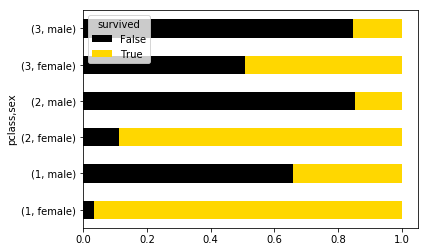

In [24]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot.barh(stacked=True, color=['black','gold'])

## Histogramas

Frecuentemente es útil observar la *distribución* de los datos antes de analizarlos. Los Histogramas son un tipo de gráficos de barra que muestran frecuencias relativas en conjuntos de datos, por lo que el eje Y siempre es alguna medida de frecuencia. Estas pueden ser simples conteos o proporciones escaladas.

Por ejemplo, puede que queramos observar la distribución de precios de tiquetes en el Titanic:

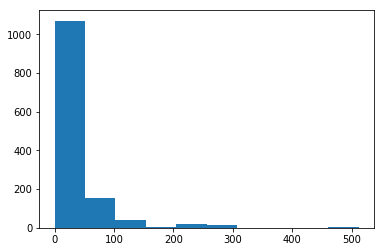

In [25]:
titanic.fare.hist(grid=False)

El método `hist` asigna los valores continuos de `fare` en **bins** (contenedores), intentando hacer una decisión razonable acerca de cuantos contenedores usar, y que tan *anchos* deben ser. Podemos controlar estos números especificando un rango:

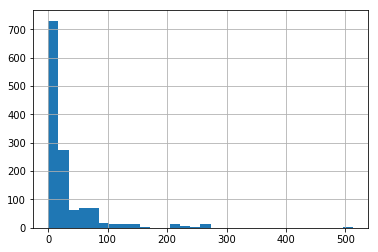

In [26]:
titanic.fare.hist(bins=30)

Existen algoritmos para determinar la cantidad "óptima" de bins, cada uno dependiendo del número de observaciones en los datos.

In [27]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
doanes(titanic.fare.dropna())

14

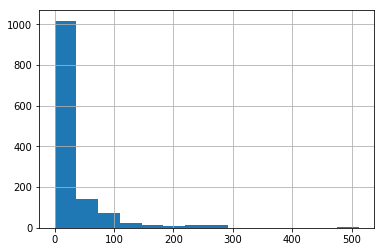

In [28]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

Un **gráfico de densidad** es similar a un histograma en que describe una distribución dentro de los datos, pero en vez de verse como una representación empírica, intenta *estimar* la distribución real detras de las muestras obtenidas, lo que hace que se represente como una linea continua. En Pandas estos gráficos se crean usando el keyword `kind=true` en el método de `plot`:

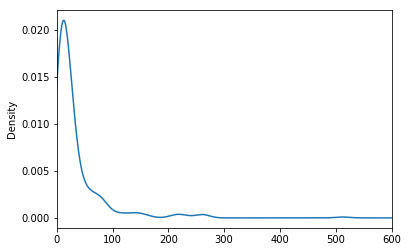

In [29]:
titanic.fare.dropna().plot.kde(xlim=(0,600))

Es posible combinar ambos tipos de gráfico en uno solo:

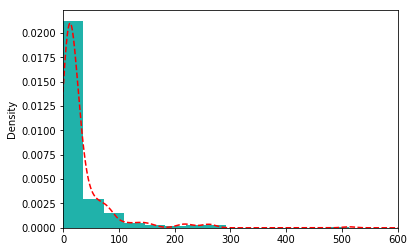

In [30]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot.kde(xlim=(0,600), style='r--')

En el ejemplo anterior, se tuvo que normalizar los valores en el histograma (`normed=True`) debido a que la distribución estimada, al representar porcentajes, siempre va a estar normalizada por definición.

## Boxplots

Una amnera diferente de visualizar la distribución de datos es por medio del uso de boxplot, el cual es una visualización de varios valores cuantiles, tipicamente los cuartiles y los valores del 5% superior e inferior.

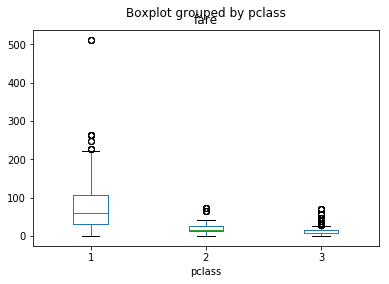

In [31]:
titanic.boxplot(column='fare', by='pclass', grid=False)

Puede pensarse en un boxplot como una observación de la distribución "desde arriba". 

Una manera de agregar más información a un boxplot es mostrando también los datos reales, sin embargo esto es solo viable con datasets pequeños o de tamaño moderado.

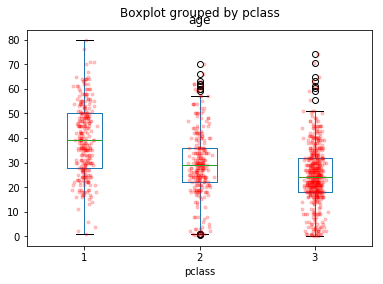

In [32]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

Cuando los datos son densos, pueden usarse un par de trucos para ayudar la visualización:

1. Reducir el nivel alfa (transparencia) de los puntos.
2. Agregar "jitter" aleatorio en el eje x para evitar colisiones.

## Gráficos de Puntos

In [34]:
wine = pd.read_table("data/wine.dat", sep='\s+')

attributes = ['Grape',
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

wine.columns = attributes

Los gráficos de puntos son útiles para exploración de datos en la que se desea descubrir relaciones entre variables:

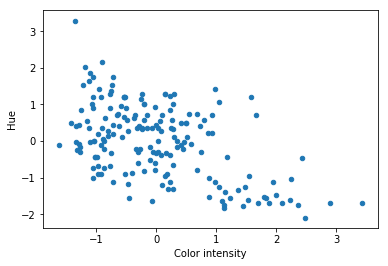

In [35]:
wine.plot.scatter('Color intensity', 'Hue')

Es posible agregar información adicional asignando variables al tamaño o color de los puntos en el gráfico:

/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


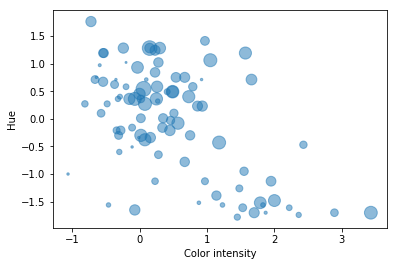

In [36]:
wine.plot.scatter('Color intensity', 'Hue', s=wine.Alcohol*100, alpha=0.5)

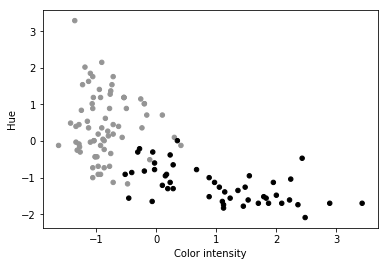

In [37]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Grape)

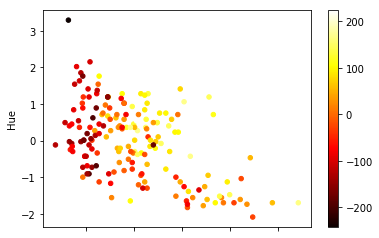

In [38]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Alcohol*100, cmap='hot')

Para observar un gráfico de puntos de un número grande de variables de manera simultanea, puede emplearse la función `scatter_matrix`. Esta genera una matriz de gráficos de pares de variables, opcionalmente con histogramas o aproximaciones de distribución en la diagonal.

/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


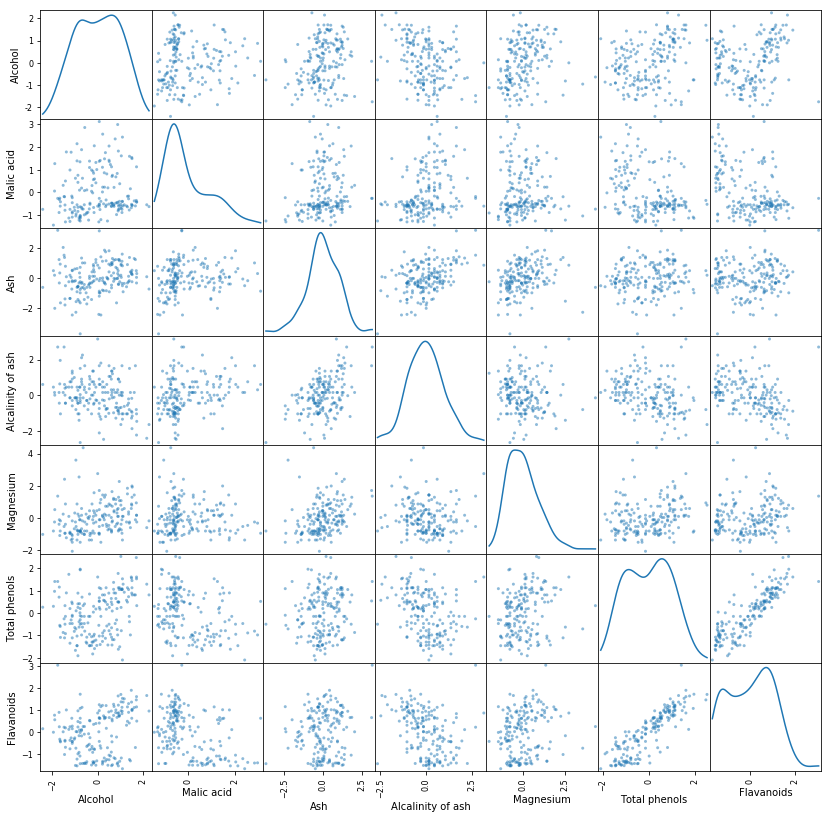

In [39]:
_ = pd.scatter_matrix(wine.loc[:, 'Alcohol':'Flavanoids'], figsize=(14,14), diagonal='kde')